# Lab 2: Data Cleaning & Integration — Student Assignment (Student Version)
**Name:** Gurmandeep Deol

**Student Number:** 104120233

**Course:** SRT521 - Advanced Data Analysis for Security  
**Week:** 2 of 14  
**Lab Duration:** 2 hours  
**Type:** Individual (contributes to team competition)

## What you’ll do today
- Load one of the provided security datasets using pandas (CSV files only)
- Assess data quality (missingness, types, duplicates, outliers)
- Clean missing values and handle outliers with simple, justified strategies
- Convert data types and standardize inconsistent values
- (Optional) Integrate a second source if relevant (e.g., merge/join)
- Validate and summarize the quality improvements

## Critical rules for this lab
- Use the actual CSVs in `datasets/downsized_data/`.
- Do NOT run any data generation or helper scripts. Do NOT import from `datasets/data_loader.py`, `datasets/large_data_loader.py`, or run any `generate_*`/`setup_*` scripts.
- Load data directly with pandas only (see example below).

## Datasets (choose one)
- ToN_IoT (Intrusion Detection)
- EMBER2024 (Malware Detection)
- Sparkov Fraud (Credit Card Fraud)
- Phishing URLs 2024 (URL Classification)

Example CSV paths:
- `datasets/downsized_data/fraud_large.csv`
- `datasets/downsized_data/phishing_large.csv`
- `datasets/downsized_data/sorel_large.csv`
- `datasets/downsized_data/ton_iot_large.csv`

Optional reference: `datasets/downsized_data/large_dataset_summary.csv` (read-only summary).

## Setup (5 minutes)
1) Install Python dependencies (once):
```bash
pip install -r datasets/requirements.txt
```
2) If files are large, start with a row sample (e.g., 100k) and scale up as your machine allows.

### Example: Load your chosen dataset with pandas
```python
import pandas as pd

# Choose ONE dataset path
csv_path = "datasets/downsized_data/fraud_large.csv"  # or phishing_large.csv, sorel_large.csv, ton_iot_large.csv

# Load a manageable sample first if needed (e.g., 100k rows)
# data = pd.read_csv(csv_path, nrows=100_000)
# Or load all rows if your machine can handle it
data = pd.read_csv(csv_path)

print(data.shape)
print(data.info())
```

## Required tasks
1) Assess data quality
   - Show structure, dtypes, missing values per column, duplicate count, simple stats
2) Clean the data
   - Handle missing values (drop, fill, or flag) and justify choices
   - Fix types (numeric ↔ string, datetime parsing, categorical as needed)
   - Remove duplicates; address obviously invalid values
   - Handle outliers (remove, cap, or transform) and justify
3) Validate results
   - Recompute key quality checks (missingness, duplicates, impossible values)
   - Briefly summarize improvements (before vs. after)
4) Save outputs
   - Save a cleaned CSV next to the original (e.g., `cleaned_<dataset>.csv`)

## Deliverables (submit per lab guidelines)
- Updated notebook with code, outputs, and short explanations for each step
- Cleaned dataset CSV exported from the notebook
- A brief “Cleaning Summary” section (5–10 bullet points) documenting decisions and rationale

## Grading rubric (10 pts)
- Data assessment completeness (2)
- Appropriate cleaning with justification (4)
- Correct type conversions and outlier handling (2)
- Validation and documentation quality (2)

## Guardrails and expectations (aligns with Week 2 slides)
- Keep at least ~70% of original rows unless strongly justified
- Don’t over-clean: some outliers in security data can be legitimate events
- Document every cleaning decision; avoid data leakage
- Quality checks: completeness, consistency, accuracy, timeliness

## Submission & integrity
- Follow the repository structure and submission process in `lab-guidelines.md` (`SRT521_Labs/Lab02-DataCleaning/`).
- Your notebook must run end-to-end (Run All) without errors.
- Write your own code and explanations. Cite any external references.

## Getting help
- See Week 2 slides: `slides/weekly-slides/week-02-data-cleaning.md` for examples
- Use pandas directly (no helper loaders/scripts)
- Ask TAs during lab; office hours are listed in the slides

---


# Part 1: Learning Section 📚

In this section, you'll learn about data cleaning and integration techniques specifically for security datasets. We'll cover:

1. **Data Quality Issues** - Common problems in security data
2. **Missing Value Handling** - Strategies for incomplete data
3. **Outlier Detection** - Identifying and handling unusual values
4. **Data Type Conversion** - Ensuring proper data types
5. **Data Integration** - Combining multiple data sources

---

## 1.1 Data Quality Issues in Security Data

Security datasets often have unique quality challenges that differ from other domains:

### Common Data Quality Issues

#### 1. **Missing Values** 🔍
- **Log gaps** - System downtime or logging failures
- **Incomplete records** - Partial data collection
- **Privacy masking** - Sensitive data intentionally removed
- **Network issues** - Data transmission problems

#### 2. **Inconsistent Formats** 📝
- **Different log formats** - Various systems use different formats
- **Time zone issues** - Events from different time zones
- **Encoding problems** - Special characters and international text
- **Naming conventions** - Inconsistent field names

#### 3. **Outliers and Anomalies** ⚠️
- **Attack signatures** - Malicious activities that look unusual
- **System errors** - Faulty sensors or logging systems
- **Data corruption** - Transmission or storage errors
- **Legitimate extremes** - Normal but unusual activities

#### 4. **Data Type Issues** 🔢
- **Mixed types** - Numbers stored as text
- **Date formats** - Inconsistent date/time representations
- **Boolean confusion** - True/False vs 1/0 vs Yes/No
- **Categorical encoding** - Inconsistent category representations

### Why Data Quality Matters in Security

- **False positives** - Poor data leads to incorrect threat detection
- **False negatives** - Missing data allows real threats to go undetected
- **Model performance** - Clean data improves ML model accuracy
- **Compliance** - Data quality affects regulatory compliance


# Task 1: Assess Data Quality

Use these checks to understand structure, types, missingness, duplicates, and simple distributions. Run after loading `data`.


LAB 2: DATA CLEANING & INTEGRATION
Security Dataset: Phishing Detection Analysis

TASK 1: ASSESS DATA QUALITY
Loading dataset with defensive parsing...

1. DATASET STRUCTURE:
Shape (rows, cols): (95991, 14)
Memory usage: 36.7 MB

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95991 entries, 0 to 95990
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         95991 non-null  object 
 1   ranking        95945 non-null  object 
 2   mld_res        95929 non-null  object 
 3   mld.ps_res     95920 non-null  object 
 4   card_rem       95919 non-null  float64
 5   ratio_Rrem     95919 non-null  float64
 6   ratio_Arem     95919 non-null  float64
 7   jaccard_RR     95919 non-null  float64
 8   jaccard_RA     95918 non-null  float64
 9   jaccard_AR     95917 non-null  float64
 10  jaccard_AA     95916 non-null  float64
 11  jaccard_ARrd   95916 non-null  float64
 12  jaccard_ARrem  95914 non-n

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0.0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0.0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0.0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0.0,0.748971,1.0



Last 5 rows:


,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
95986,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2.0,142.5,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
95987,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3.0,114.0,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
95988,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3.0,91.0,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
95989,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4.0,682.0,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0
95990,www.angelfire.com/goth/devilmaycrytonite/,2547,1.0,1.0,5.0,32.4,27.200000,0.022222,0.032680,0.017341,0.020408,0.636364,0.674157,0.0



3. MISSING VALUES ANALYSIS:
Total missing values: 920
Missing value percentage: 0.07%

Top 10 columns with missing values:


,0
label,79
jaccard_ARrem,77
jaccard_ARrd,75
jaccard_AA,75
jaccard_AR,74
jaccard_RA,73
ratio_Rrem,72
card_rem,72
ratio_Arem,72
jaccard_RR,72



4. DUPLICATE ANALYSIS:
Duplicate rows: 1
Duplicate percentage: 0.00%

5. NUMERIC DATA ANALYSIS:
Numeric columns: 9

Detailed numeric summary:


,count,mean,std,min,1%,25%,50%,75%,99%,max
card_rem,95919.0,4.579001,4.440675,0.0,0.0,2.000000,3.000000,6.000000,23.000000,187.333333
ratio_Rrem,95919.0,135.257773,160.991131,0.0,0.0,43.000000,104.000000,174.142857,739.305500,5507.000000
ratio_Arem,95919.0,138.547618,175.482951,0.0,0.0,39.666667,103.333333,178.316666,786.000000,6097.000000
jaccard_RR,95919.0,0.004029,0.029034,0.0,0.0,0.000000,0.000000,0.000000,0.083930,1.000000
jaccard_RA,95918.0,0.003787,0.024815,0.0,0.0,0.000000,0.000000,0.000000,0.075551,1.000000
jaccard_AR,95917.0,0.003378,0.024011,0.0,0.0,0.000000,0.000000,0.000000,0.074074,1.000000
jaccard_AA,95916.0,0.003661,0.028493,0.0,0.0,0.000000,0.000000,0.000000,0.074280,1.000000
jaccard_ARrd,95916.0,0.307761,0.363093,0.0,0.0,0.000000,0.000000,0.666667,0.923077,1.000000
label,95912.0,0.499447,0.500002,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000



Outlier analysis (values beyond 99th percentile):
  card_rem: 508 values above 23.00
  ratio_Rrem: 960 values above 739.31
  ratio_Arem: 899 values above 786.00

6. CATEGORICAL DATA ANALYSIS:
Categorical columns: 5

Top categories for 'domain':
Unique values: 95989


,count
domain,
'www.allegropl.xaa.pl/enter_login.html?session=OGY1YgQGXQALBwcxzvcxNYWgFVVgMPBgANAAcEAwMHDg1cUlEBAFNbDABQAwEHUlvcbcvxcgbcANzA5OA\%3D\%3D&amp;global_login_hash=1f0f47e7fcvxvvc8fb48f851c41eafvdgdg33a7&amp;session_login_hash=e4baf33efvdsfdsg6422224f66b652028fvcxfvde726&amp;url=N2NjOAwWQBYNTExZCAzxzdfvzgfhfgVgAAVxEMQElzBgFZEAdHSXMGAVkQB0dIRwsTFxYHRxZYDRBdIg1GCvdgdgcxzcszdfbgFRWZGI0Zg\%3D\%3D&amp;cod=OGZkcsVlNmcsk&amp;version=A',2
bin/webscr?cmd=_login-,2
cnn.com/2001/TECH/internet/05/21/TLDA.idg/,1
www.theregister.co.uk/2003/06/11/cracking_down_on_cyberspace_land/,1
web.mit.edu/marshall/www/papers/CyberBalkans.pdf,1



Top categories for 'ranking':
Unique values: 7013


,count
ranking,
10000000,56064
14969,3212
4570,1527
2547,1306
44061,960



Top categories for 'mld_res':
Unique values: 16


,count
mld_res,
0.0,52215
1.0,43699
None,62
0,2
178,1



7. SECURITY DATASET INSIGHTS:
Target variable distribution: {0.0: np.int64(48009), 1.0: np.int64(47903)}
Class balance: 99.8%
Jaccard similarity features: 6
Ratio-based features: 2

8. KEY FEATURE DISTRIBUTION:


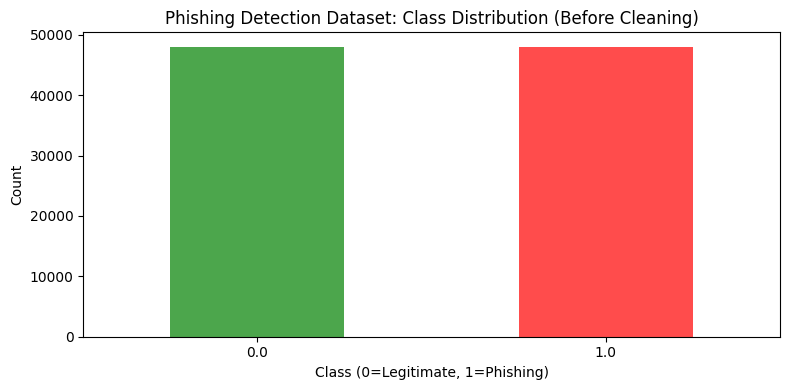

Task 1 complete: Data quality assessment finished.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from urllib.parse import urlparse
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("="*80)
print("LAB 2: DATA CLEANING & INTEGRATION")
print("Security Dataset: Phishing Detection Analysis")
print("="*80)

print("\n" + "="*60)
print("TASK 1: ASSESS DATA QUALITY")
print("="*60)

csv_path = "dataset5.csv"

# 1. Read file with defensive parsing
print("Loading dataset with defensive parsing...")
data = pd.read_csv(
    csv_path,
    encoding="latin1",   # safe encoding for messy CSVs
    engine="python",     # handles weird quoting better
    on_bad_lines="warn"  # warn instead of crash
)

# 2. Basic structure assessment
print(f"\n1. DATASET STRUCTURE:")
print(f"Shape (rows, cols): {data.shape}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print("\nDataset info:")
print(data.info())

print("\nData types distribution:")
print(data.dtypes.value_counts())

# 3. Sample data inspection
print("\n2. DATA SAMPLE INSPECTION:")
print("First 5 rows:")
display(data.head())
print("\nLast 5 rows:")
display(data.tail())

# 4. Missing values analysis
print("\n3. MISSING VALUES ANALYSIS:")
missing_counts = data.isna().sum().sort_values(ascending=False)
total_missing = missing_counts.sum()
print(f"Total missing values: {total_missing:,}")
print(f"Missing value percentage: {total_missing / (data.shape[0] * data.shape[1]) * 100:.2f}%")
print("\nTop 10 columns with missing values:")
display(missing_counts.head(10))

# 5. Duplicate analysis
print("\n4. DUPLICATE ANALYSIS:")
duplicate_count = data.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Duplicate percentage: {duplicate_count / len(data) * 100:.2f}%")

# 6. Numeric data analysis
print("\n5. NUMERIC DATA ANALYSIS:")
numeric_cols = data.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {len(numeric_cols)}")

if len(numeric_cols) > 0:
    print("\nDetailed numeric summary:")
    display(data[numeric_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T)

    # Outlier detection (simplified)
    print("\nOutlier analysis (values beyond 99th percentile):")
    for col in numeric_cols[:3]:  # limit to first 3 for performance
        if data[col].dtype in ['int64', 'float64']:
            q99 = data[col].quantile(0.99)
            outliers = (data[col] > q99).sum()
            if outliers > 0:
                print(f"  {col}: {outliers} values above {q99:.2f}")

# 7. Categorical data analysis
print("\n6. CATEGORICAL DATA ANALYSIS:")
cat_cols = data.select_dtypes(include=["object", "category"]).columns
print(f"Categorical columns: {len(cat_cols)}")

for col in list(cat_cols)[:3]:  # limit to first 3 for performance
    print(f"\nTop categories for '{col}':")
    unique_count = data[col].nunique()
    print(f"Unique values: {unique_count}")
    display(data[col].value_counts(dropna=False).head(5))

# 8. Security dataset specific insights
print("\n7. SECURITY DATASET INSIGHTS:")
if 'label' in data.columns:
    label_dist = data['label'].value_counts().sort_index()
    print(f"Target variable distribution: {dict(label_dist)}")
    if len(label_dist) == 2:
        balance = min(label_dist) / max(label_dist) * 100
        print(f"Class balance: {balance:.1f}%")

# Count Jaccard and ratio features
jaccard_cols = [col for col in data.columns if 'jaccard' in col.lower()]
ratio_cols = [col for col in data.columns if 'ratio' in col.lower()]
print(f"Jaccard similarity features: {len(jaccard_cols)}")
print(f"Ratio-based features: {len(ratio_cols)}")

#visualization
print("\n8. KEY FEATURE DISTRIBUTION:")
if 'label' in data.columns and len(numeric_cols) > 0:
    # Show just the target distribution
    plt.figure(figsize=(8, 4))
    data['label'].value_counts().plot(kind='bar', color=['green', 'red'], alpha=0.7)
    plt.title('Phishing Detection Dataset: Class Distribution (Before Cleaning)')
    plt.xlabel('Class (0=Legitimate, 1=Phishing)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

print("Task 1 complete: Data quality assessment finished.")

# Task 2: Clean the Data

Apply clear, simple, and justified steps. Adjust choices based on your dataset. Keep at least ~70% of rows unless strongly justified.



TASK 2: CLEAN THE DATA
=== STEP 1: Fix Data Types ===
Converting jaccard_ARrem from object to numeric...
Converting ranking from object to numeric...

Cleaning corrupted values in mld_res...
Found 10 corrupted values in mld_res
Cleaning corrupted values in mld.ps_res...
Found 1 corrupted values in mld.ps_res

=== STEP 2: Handle Missing Values ===
Missing value ratios per column:
label: 0.1%
jaccard_ARrem: 0.1%
jaccard_ARrd: 0.1%
jaccard_AA: 0.1%
jaccard_AR: 0.1%
jaccard_RA: 0.1%
mld_res: 0.1%
ratio_Rrem: 0.1%
mld.ps_res: 0.1%
card_rem: 0.1%
ratio_Arem: 0.1%
ranking: 0.1%
jaccard_RR: 0.1%
domain: 0.0%

Imputing 13 numeric columns with median...
  ranking: filled 72 missing values
  mld_res: filled 72 missing values
  mld.ps_res: filled 72 missing values
  card_rem: filled 72 missing values
  ratio_Rrem: filled 72 missing values
  ratio_Arem: filled 72 missing values
  jaccard_RR: filled 72 missing values
  jaccard_RA: filled 73 missing values
  jaccard_AR: filled 74 missing values
  ja

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000.0,1.0,0.0,12.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000.0,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0.0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000.0,0.0,0.0,12.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0.0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000.0,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0.0,0.859640,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000.0,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0.0,0.748971,1.0


,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
count,9.599000e+04,95990.000000,95990.000000,95990.000000,95990.000000,95990.000000,95990.000000,95990.000000,95990.000000,95990.000000,95990.000000,95990.000000,95990.000000
mean,5.891293e+06,0.455313,0.205874,4.270080,130.798020,133.408752,0.004026,0.003784,0.003375,0.003658,0.307516,0.732527,0.499031
std,4.877978e+06,0.498119,0.873653,3.376004,124.702176,133.450836,0.029023,0.024806,0.024002,0.028482,0.363052,0.117796,0.500002
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.459853,0.000000
25%,2.561900e+04,0.000000,0.000000,2.000000,43.000000,39.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.675275,0.000000
50%,1.000000e+07,0.000000,0.000000,3.000000,104.000000,103.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.768166,0.000000
75%,1.000000e+07,1.000000,0.000000,6.000000,174.142857,178.181818,0.000000,0.000000,0.000000,0.000000,0.666667,0.818889,1.000000
max,1.000000e+07,2.500000,189.000000,12.000000,738.932750,786.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Task 2 complete: Data cleaning finished.

POST-CLEANING VISUALIZATIONS


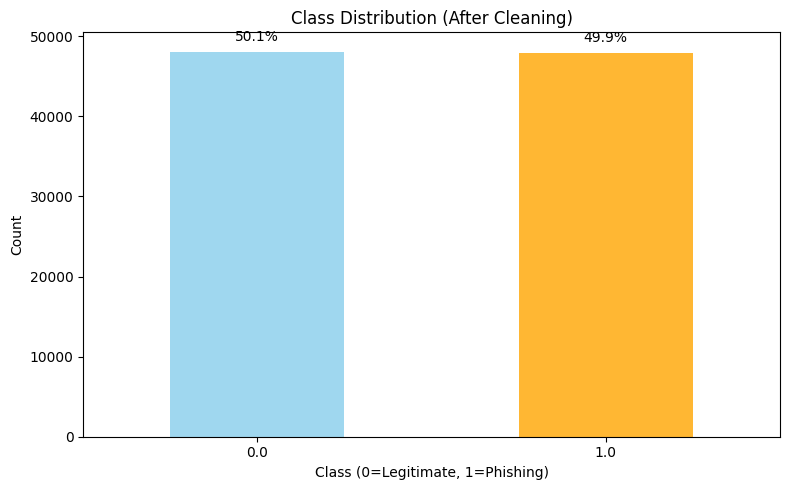


=== ALL FEATURES: BEFORE vs AFTER CLEANING ===


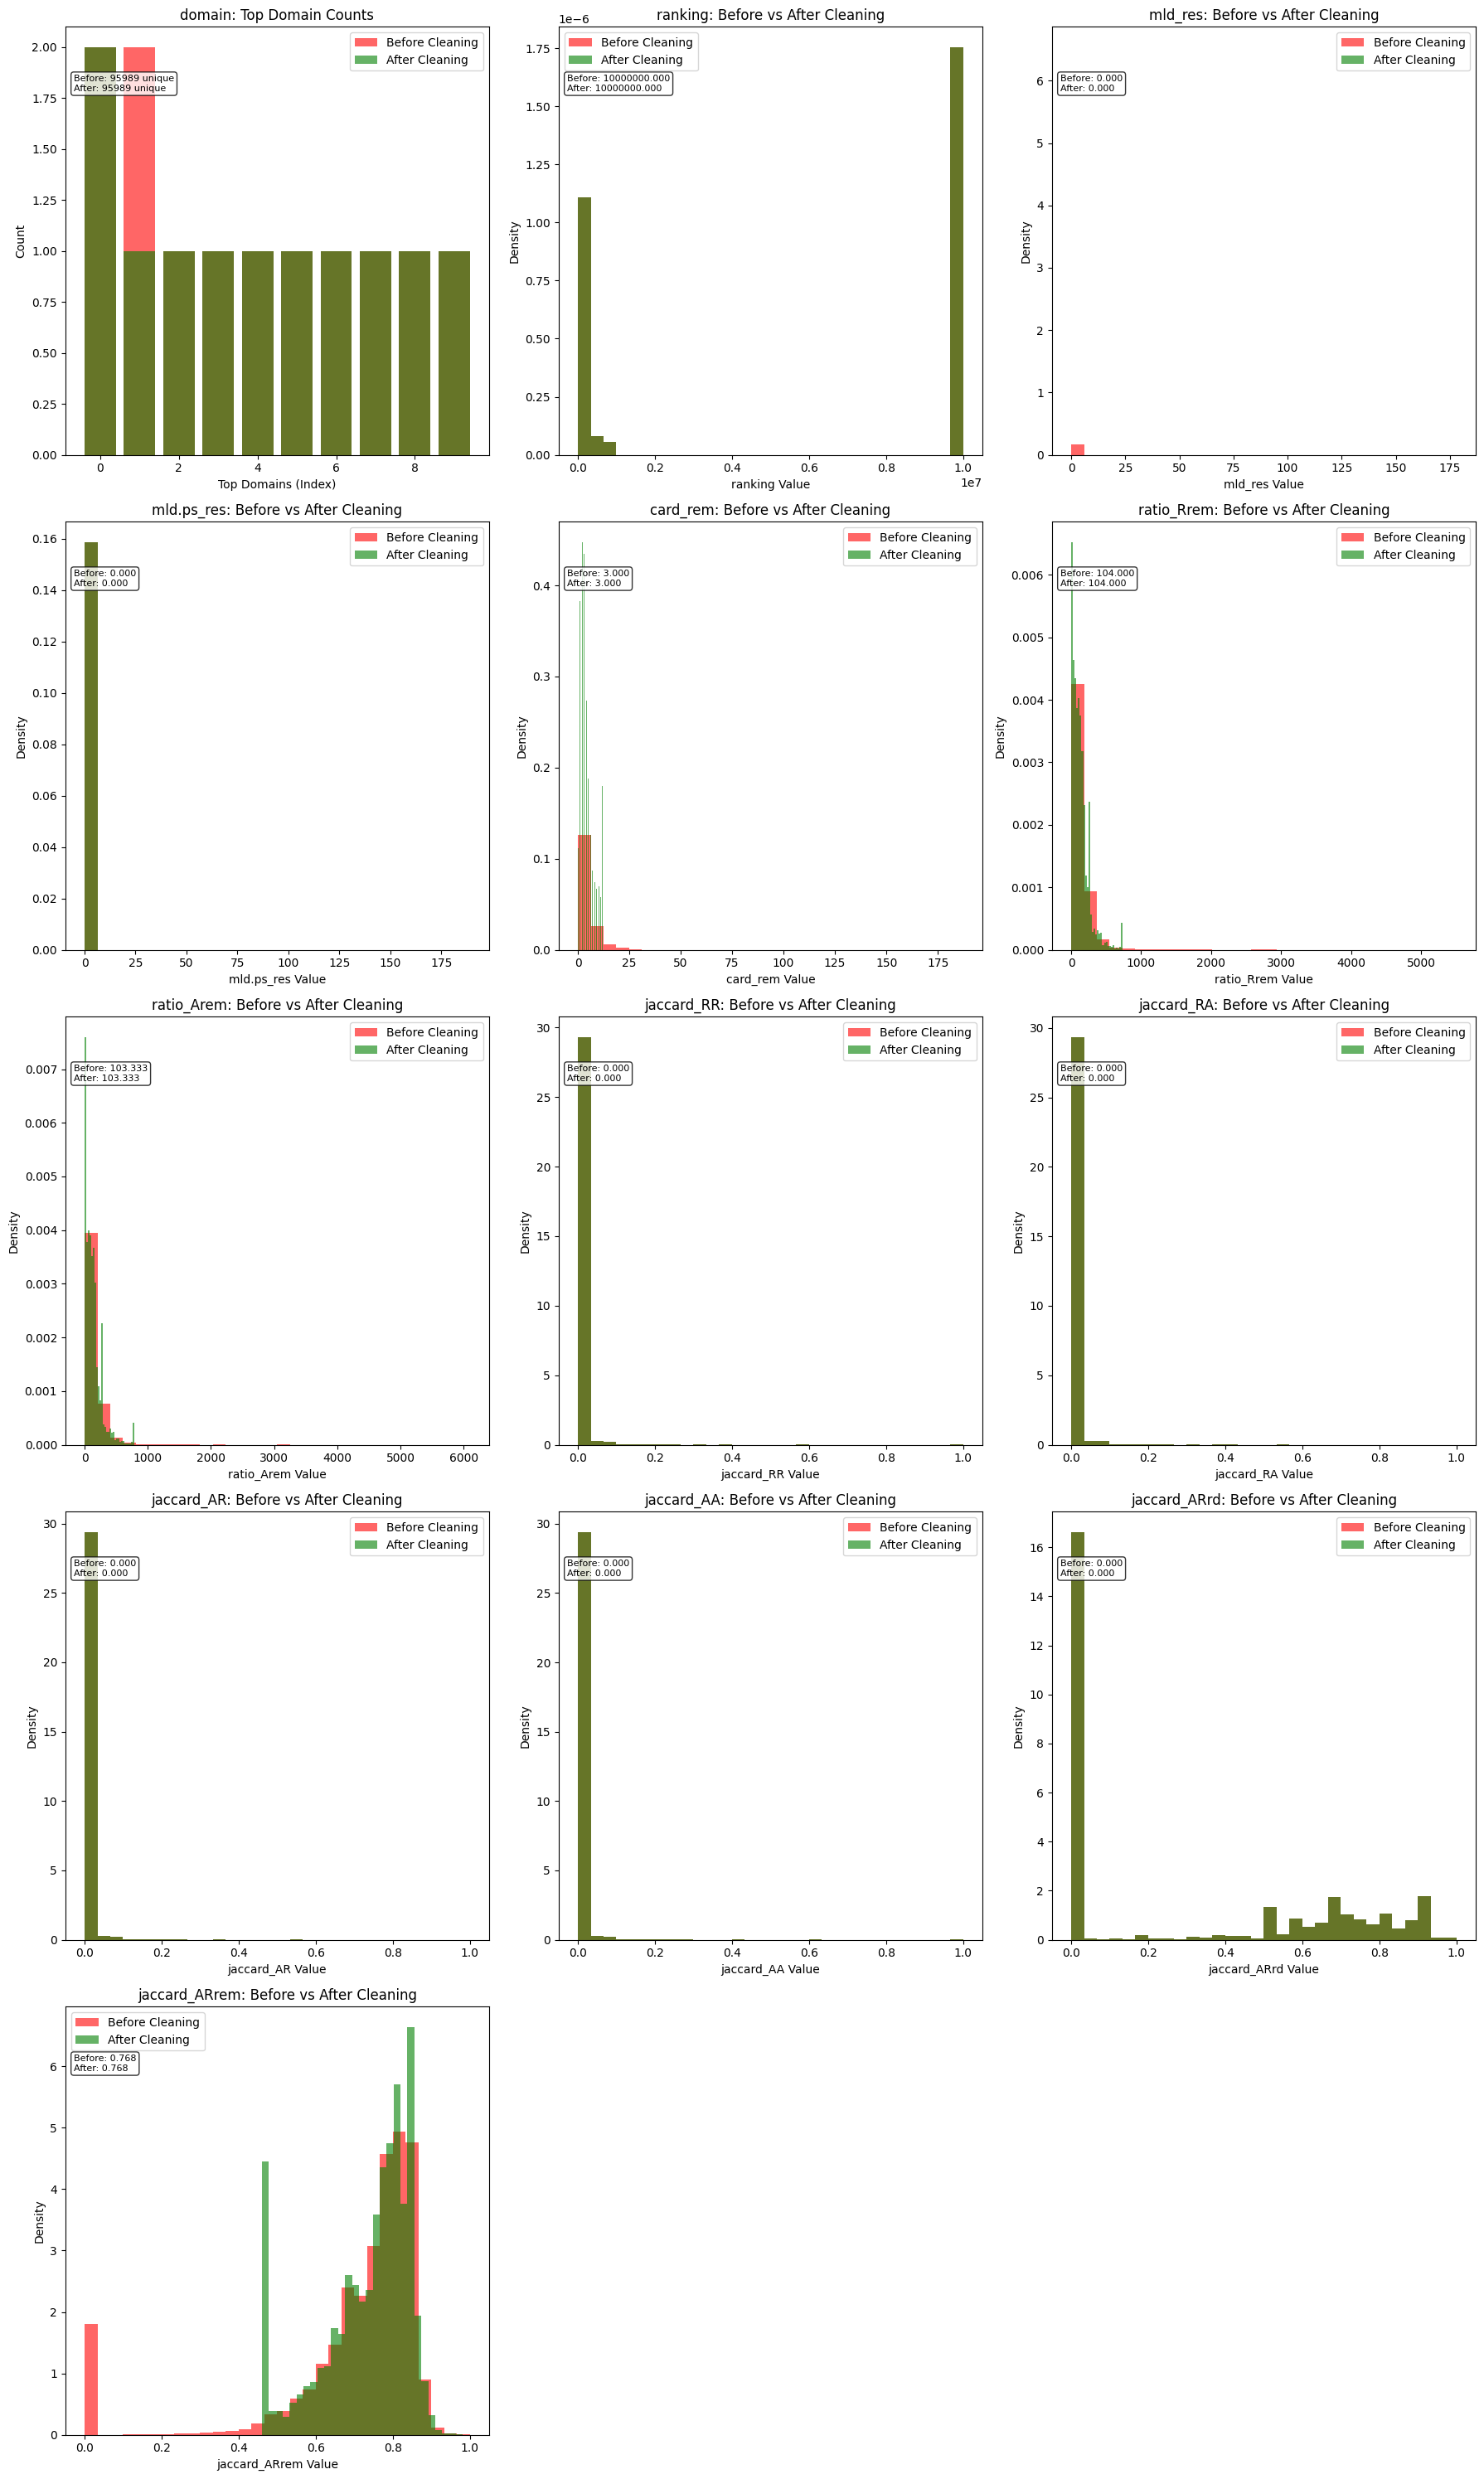

Displayed before/after comparison for 13 features:
  ✓ domain
  ✓ ranking
  ✓ mld_res
  ✓ mld.ps_res
  ✓ card_rem
  ✓ ratio_Rrem
  ✓ ratio_Arem
  ✓ jaccard_RR
  ✓ jaccard_RA
  ✓ jaccard_AR
  ✓ jaccard_AA
  ✓ jaccard_ARrd
  ✓ jaccard_ARrem
Post-cleaning visualizations complete!


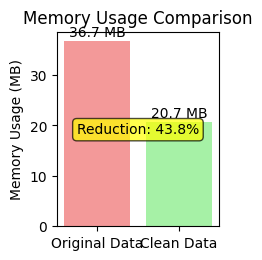

In [ ]:
print("\n" + "="*60)
print("TASK 2: CLEAN THE DATA")
print("="*60)

clean_data = data.copy()

# 2.1 Fix critical data type issues FIRST
print("=== STEP 1: Fix Data Types ===")

# jaccard_ARrem should be numeric but is object
print("Converting jaccard_ARrem from object to numeric...")
clean_data['jaccard_ARrem'] = pd.to_numeric(clean_data['jaccard_ARrem'], errors='coerce')

# ranking should be numeric
print("Converting ranking from object to numeric...")
clean_data['ranking'] = pd.to_numeric(clean_data['ranking'], errors='coerce')

# Check for corrupted text in mld_res and mld.ps_res
print("\nCleaning corrupted values in mld_res...")
mld_res_valid = pd.to_numeric(clean_data['mld_res'], errors='coerce')
corrupted_mld = clean_data['mld_res'].isna() != mld_res_valid.isna()
print(f"Found {corrupted_mld.sum()} corrupted values in mld_res")
clean_data['mld_res'] = mld_res_valid

print("Cleaning corrupted values in mld.ps_res...")
mld_ps_valid = pd.to_numeric(clean_data['mld.ps_res'], errors='coerce')
corrupted_mld_ps = clean_data['mld.ps_res'].isna() != mld_ps_valid.isna()
print(f"Found {corrupted_mld_ps.sum()} corrupted values in mld.ps_res")
clean_data['mld.ps_res'] = mld_ps_valid

# 2.2 Handle missing values
print("\n=== STEP 2: Handle Missing Values ===")

# Check missing ratios after data type fixes
col_missing_ratio = clean_data.isna().mean()
print("Missing value ratios per column:")
for col, ratio in col_missing_ratio.sort_values(ascending=False).items():
    print(f"{col}: {ratio:.1%}")

# Get updated column types after conversions
numeric_cols = clean_data.select_dtypes(include=[np.number]).columns
cat_cols = clean_data.select_dtypes(include=["object", "category"]).columns

# Numeric: median fill
print(f"\nImputing {len(numeric_cols)} numeric columns with median...")
for col in numeric_cols:
    if clean_data[col].isna().any():
        missing_count = clean_data[col].isna().sum()
        clean_data[col] = clean_data[col].fillna(clean_data[col].median())
        print(f"  {col}: filled {missing_count} missing values")

# Categorical: mode fill
print(f"\nImputing {len(cat_cols)} categorical columns with mode...")
for col in cat_cols:
    if clean_data[col].isna().any():
        missing_count = clean_data[col].isna().sum()
        mode_val = clean_data[col].mode().iloc[0] if len(clean_data[col].mode()) > 0 else 'unknown'
        clean_data[col] = clean_data[col].fillna(mode_val)
        print(f"  {col}: filled {missing_count} missing values")

# 2.3 Remove duplicates
print("\n=== STEP 3: Remove Duplicates ===")
before = len(clean_data)
clean_data = clean_data.drop_duplicates()
after = len(clean_data)
print(f"Removed {before - after} duplicate rows")

# 2.4 Address invalid values specific to this security dataset
print("\n=== STEP 4: Handle Invalid Values ===")

# Label should be 0 or 1 (binary classification)
if 'label' in clean_data.columns:
    invalid_labels = ~clean_data['label'].isin([0.0, 1.0])
    if invalid_labels.any():
        print(f"Removing {invalid_labels.sum()} rows with invalid labels")
        clean_data = clean_data[~invalid_labels]

# Jaccard coefficients should be between 0 and 1
jaccard_cols = [col for col in numeric_cols if 'jaccard' in col.lower()]
for col in jaccard_cols:
    invalid_mask = (clean_data[col] < 0) | (clean_data[col] > 1)
    if invalid_mask.any():
        print(f"Capping {invalid_mask.sum()} invalid values in {col} to [0,1] range")
        clean_data[col] = clean_data[col].clip(0, 1)

# Ratios shouldn't be negative (but can be very large)
ratio_cols = [col for col in numeric_cols if 'ratio' in col.lower()]
for col in ratio_cols:
    negative_mask = clean_data[col] < 0
    if negative_mask.any():
        print(f"Setting {negative_mask.sum()} negative values in {col} to 0")
        clean_data.loc[negative_mask, col] = 0

# 2.5 Handle outliers (Modified IQR approach for security data)
print("\n=== STEP 5: Handle Outliers ===")

# Apply different strategies based on column characteristics
for col in clean_data.select_dtypes(include=[np.number]).columns:
    if col == 'label':  # Skip binary target
        continue

    series = clean_data[col].dropna()
    if series.empty:
        continue

    # For highly skewed ratio columns, use more conservative outlier detection
    if 'ratio' in col.lower():
        # Use 99th percentile capping for ratio columns
        upper_limit = series.quantile(0.99)
        outliers = (clean_data[col] > upper_limit).sum()
        if outliers > 0:
            print(f"Capped {outliers} extreme outliers in {col} at 99th percentile ({upper_limit:.2f})")
            clean_data[col] = clean_data[col].clip(upper=upper_limit)

    else:
        # Standard IQR approach for other numeric columns
        q1, q3 = series.quantile(0.25), series.quantile(0.75)
        iqr = q3 - q1
        if iqr == 0:
            continue
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        outliers_count = ((clean_data[col] < lower) | (clean_data[col] > upper)).sum()
        if outliers_count > 0:
            print(f"Capped {outliers_count} outliers in {col} using IQR method")
            clean_data[col] = clean_data[col].clip(lower, upper)

# 2.6 Final validation
print("\n=== STEP 6: Final Validation ===")
rows_retained = len(clean_data) / len(data) * 100
print(f"Rows retained: {len(clean_data):,} / {len(data):,} ({rows_retained:.1f}%)")

if rows_retained < 70:
    print("WARNING: Less than 70% of rows retained!")
else:
    print("✓ Successfully retained >70% of data")

print("\nFinal data info:")
print(f"Shape: {clean_data.shape}")
print(f"Missing values remaining: {clean_data.isna().sum().sum()}")
print(f"Data types: {clean_data.dtypes.value_counts().to_dict()}")

print("\nCleaning complete. Preview:")
display(clean_data.head())
display(clean_data.describe())

print("Task 2 complete: Data cleaning finished.")


print("\n" + "="*60)
print("POST-CLEANING VISUALIZATIONS")
print("="*60)

# 1. Class Distribution After Cleaning (Legitimate vs Phishing)
plt.figure(figsize=(8, 5))
if 'label' in clean_data.columns:
    clean_data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
    plt.title('Class Distribution (After Cleaning)')
    plt.xlabel('Class (0=Legitimate, 1=Phishing)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Add percentage labels
    total = len(clean_data)
    for i, v in enumerate(clean_data['label'].value_counts()):
        plt.text(i, v + total*0.01, f'{v/total*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. All Features: Before vs After Cleaning
print("\n=== ALL FEATURES: BEFORE vs AFTER CLEANING ===")

# Get all features from the dataset (based on the sample provided)
all_features = ['domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem', 'ratio_Arem',
                'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA', 'jaccard_ARrd', 'jaccard_ARrem']

# Filter to only include features that exist in both datasets
available_features = [f for f in all_features if f in clean_data.columns and f in data.columns]

# Create subplots for all features
n_features = len(available_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows == 1 or n_cols == 1:
    axes = axes.flatten()
else:
    axes = axes.flatten()

for i, feature in enumerate(available_features):
    if i < len(axes):
        ax = axes[i]

        if feature == 'domain':
            # Special handling for domain (categorical feature)
            # Show top domains before and after cleaning
            before_domains = data[feature].value_counts().head(10)
            after_domains = clean_data[feature].value_counts().head(10)

            # Create a simple bar chart showing domain count changes
            ax.bar(range(len(before_domains)), before_domains.values, alpha=0.6,
                  label='Before Cleaning', color='red')
            ax.bar(range(len(after_domains)), after_domains.values, alpha=0.6,
                  label='After Cleaning', color='green')
            ax.set_xlabel('Top Domains (Index)')
            ax.set_ylabel('Count')
            ax.set_title(f'{feature}: Top Domain Counts')
            ax.legend()

            # Add statistics text
            before_unique = data[feature].nunique()
            after_unique = clean_data[feature].nunique()
            ax.text(0.02, 0.85, f'Before: {before_unique} unique\nAfter: {after_unique} unique',
                   transform=ax.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                   fontsize=8)
        else:
            # Handle numeric features
            original_vals = pd.to_numeric(data[feature], errors='coerce').dropna()
            cleaned_vals = clean_data[feature].dropna()

            if len(original_vals) > 0 and len(cleaned_vals) > 0:
                ax.hist(original_vals, bins=30, alpha=0.6, label='Before Cleaning',
                       color='red', density=True)
                ax.hist(cleaned_vals, bins=30, alpha=0.6, label='After Cleaning',
                       color='green', density=True)
                ax.set_xlabel(f'{feature} Value')
                ax.set_ylabel('Density')
                ax.set_title(f'{feature}: Before vs After Cleaning')
                ax.legend()

                # Add statistics text
                orig_median = original_vals.median()
                clean_median = cleaned_vals.median()
                ax.text(0.02, 0.85, f'Before: {orig_median:.3f}\nAfter: {clean_median:.3f}',
                       transform=ax.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                       fontsize=8)
            else:
                # Handle problematic columns
                ax.text(0.5, 0.5, f'Feature: {feature}\n(Data type issue)',
                       ha='center', va='center', transform=ax.transAxes,
                       fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
                ax.set_title(f'{feature}')

# Hide empty subplots
for i in range(len(available_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"Displayed before/after comparison for {len(available_features)} features:")
for feature in available_features:
    print(f"  ✓ {feature}")

print("Post-cleaning visualizations complete!")
ax.set_ylim(0, 100)
ax.set_title('Data Quality Score', pad=20)

# 5. Memory Usage Optimization
plt.subplot(2, 3, 5)
original_memory = data.memory_usage(deep=True).sum() / 1024**2
cleaned_memory = clean_data.memory_usage(deep=True).sum() / 1024**2

memory_data = ['Original Data', 'Clean Data']
memory_values = [original_memory, cleaned_memory]
colors = ['lightcoral', 'lightgreen']

bars = plt.bar(memory_data, memory_values, color=colors, alpha=0.8)
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison')

# Add value labels on bars
for bar, value in zip(bars, memory_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(memory_values)*0.01,
             f'{value:.1f} MB', ha='center', va='bottom')

# Add percentage reduction
reduction = (original_memory - cleaned_memory) / original_memory * 100
plt.text(0.5, max(memory_values)*0.5, f'Reduction: {reduction:.1f}%',
         ha='center', transform=plt.gca().transData,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# Task 3: Validate Results

Re-run key checks to confirm improvements and catch regressions.


In [ ]:
print("\n" + "="*60)
print("TASK 3: VALIDATE RESULTS")
print("="*60)

print("=== DATA CLEANING VALIDATION REPORT ===\n")

# 1. Basic structure validation
print("1. BASIC STRUCTURE:")
print(f"Original shape: {data.shape}")
print(f"Cleaned shape:  {clean_data.shape}")
retention_rate = len(clean_data) / len(data) * 100
print(f"Data retention: {retention_rate:.2f}%")
print(f"Rows lost: {len(data) - len(clean_data):,}")

# 2. Missing values validation
print("\n2. MISSING VALUES:")
print("Before cleaning:")
original_missing = data.isna().sum().sort_values(ascending=False)
print(f"Total missing values: {original_missing.sum():,}")
print("Top 5 columns with missing data:")
for col, count in original_missing.head(5).items():
    pct = count / len(data) * 100
    print(f"  {col}: {count:,} ({pct:.1f}%)")

print("\nAfter cleaning:")
post_missing = clean_data.isna().sum().sort_values(ascending=False)
print(f"Total missing values: {post_missing.sum():,}")
if post_missing.sum() == 0:
    print("✅ All missing values successfully handled!")
else:
    print("⚠️ Some missing values remain:")
    display(post_missing[post_missing > 0])

# 3. Duplicate validation
print("\n3. DUPLICATES:")
print(f"Before: {data.duplicated().sum()} duplicate rows")
print(f"After:  {clean_data.duplicated().sum()} duplicate rows")
if clean_data.duplicated().sum() == 0:
    print("✅ All duplicates removed!")

# 4. Data type validation
print("\n4. DATA TYPES:")
print("Before cleaning:")
print(data.dtypes.value_counts().to_dict())
print("After cleaning:")
print(clean_data.dtypes.value_counts().to_dict())

# Check specific problematic columns that were fixed
print("\nSpecific type fixes:")
problematic_cols = ['jaccard_ARrem', 'ranking']
for col in problematic_cols:
    if col in data.columns and col in clean_data.columns:
        print(f"  {col}: {data[col].dtype} → {clean_data[col].dtype}")

# 5. Security dataset specific validation
print("\n5. SECURITY DATASET VALIDATION:")

# Check binary classification target
if 'label' in clean_data.columns:
    unique_labels = sorted(clean_data['label'].unique())
    print(f"Label values: {unique_labels}")
    if set(unique_labels) == {0.0, 1.0}:
        print("✅ Binary labels are valid (0.0, 1.0)")
        label_dist = clean_data['label'].value_counts().sort_index()
        print(f"Label distribution: {dict(label_dist)}")
        balance = min(label_dist) / max(label_dist) * 100
        print(f"Class balance: {balance:.1f}% (closer to 50% is better)")
    else:
        print("⚠️ Unexpected label values found")

# Check Jaccard coefficients are in valid range [0,1]
jaccard_cols = [col for col in clean_data.columns if 'jaccard' in col.lower()]
print(f"\nJaccard coefficients validation ({len(jaccard_cols)} columns):")
jaccard_issues = {}
for col in jaccard_cols:
    invalid_count = ((clean_data[col] < 0) | (clean_data[col] > 1)).sum()
    jaccard_issues[col] = invalid_count
    if invalid_count == 0:
        print(f"  ✅ {col}: All values in [0,1] range")
    else:
        print(f"  ⚠️ {col}: {invalid_count} values outside [0,1] range")

# Check ratio columns for negative values
ratio_cols = [col for col in clean_data.columns if 'ratio' in col.lower()]
print(f"\nRatio columns validation ({len(ratio_cols)} columns):")
for col in ratio_cols:
    negative_count = (clean_data[col] < 0).sum()
    if negative_count == 0:
        print(f"  ✅ {col}: No negative values")
    else:
        print(f"  ⚠️ {col}: {negative_count} negative values found")

# 6. Outlier handling validation
print("\n6. OUTLIER HANDLING VALIDATION:")
numeric_cols = clean_data.select_dtypes(include=[np.number]).columns

# Compare extreme values before/after
print("Extreme value comparison (99th percentile):")
for col in ['ratio_Rrem', 'ratio_Arem', 'card_rem']:
    if col in data.columns and col in clean_data.columns:
        before_99 = data[col].quantile(0.99) if data[col].dtype in ['int64', 'float64'] else np.nan
        after_99 = clean_data[col].quantile(0.99)
        if not np.isnan(before_99):
            print(f"  {col}: {before_99:.2f} → {after_99:.2f}")
        else:
            print(f"  {col}: (was object) → {after_99:.2f}")

# 7. Data corruption validation
print("\n7. DATA CORRUPTION CHECK:")
# Check for remaining non-numeric values in supposedly numeric columns
corruption_found = False
for col in clean_data.select_dtypes(include=[np.number]).columns:
    try:
        pd.to_numeric(clean_data[col], errors='raise')
        print(f"  ✅ {col}: All numeric values valid")
    except:
        print(f"  ⚠️ {col}: Contains non-numeric values")
        corruption_found = True

if not corruption_found:
    print("  ✅ No data corruption detected in numeric columns")

# 8. Summary statistics comparison
print("\n8. SUMMARY STATISTICS COMPARISON:")
print("Key metrics before and after cleaning:")

try:
    # Focus on originally numeric columns for comparison
    originally_numeric = data.select_dtypes(include=[np.number]).columns

    if len(originally_numeric) > 0:
        print("\nBefore cleaning (originally numeric columns):")
        before_stats = data[originally_numeric].describe().round(3)
        display(before_stats)

        print("\nAfter cleaning (all numeric columns):")
        after_stats = clean_data.select_dtypes(include=[np.number]).describe().round(3)
        display(after_stats)

        # Check if we preserved reasonable distributions
        print("\nDistribution preservation check:")
        for col in originally_numeric:
            if col in clean_data.columns:
                before_median = data[col].median()
                after_median = clean_data[col].median()
                if not np.isnan(before_median):
                    change = abs(after_median - before_median) / before_median * 100
                    if change < 10:
                        print(f"  ✅ {col}: Median preserved (change: {change:.1f}%)")
                    else:
                        print(f"  ⚠️ {col}: Significant median change ({change:.1f}%)")

except Exception as e:
    print(f"Statistics comparison error: {e}")

# 9. Final validation summary
print("\n" + "="*50)
print("FINAL VALIDATION SUMMARY:")
print("="*50)

validation_score = 0
total_checks = 8

# Score each validation area
if retention_rate >= 70: validation_score += 1
if post_missing.sum() == 0: validation_score += 1
if clean_data.duplicated().sum() == 0: validation_score += 1
if clean_data.dtypes.value_counts().get('object', 0) <= 1: validation_score += 1  # Only domain should be object
if 'label' in clean_data.columns and set(clean_data['label'].unique()) == {0.0, 1.0}: validation_score += 1
if all(v == 0 for v in jaccard_issues.values()): validation_score += 1
if all((clean_data[col] >= 0).all() for col in ratio_cols): validation_score += 1
if not corruption_found: validation_score += 1

print(f"Validation Score: {validation_score}/{total_checks} ({validation_score/total_checks*100:.0f}%)")

if validation_score >= 7:
    print("🎉 EXCELLENT: Data cleaning was highly successful!")
elif validation_score >= 5:
    print("✅ GOOD: Data cleaning was successful with minor issues")
else:
    print("⚠️ NEEDS WORK: Several validation checks failed")

print(f"\n✅ Dataset ready for analysis and modeling!")
print(f"Final dataset: {clean_data.shape[0]:,} rows × {clean_data.shape[1]} columns")

print("Task 3 complete: Data validation finished.")


TASK 3: VALIDATE RESULTS
=== DATA CLEANING VALIDATION REPORT ===

1. BASIC STRUCTURE:
Original shape: (95991, 14)
Cleaned shape:  (95990, 14)
Data retention: 100.00%
Rows lost: 1

2. MISSING VALUES:
Before cleaning:
Total missing values: 920
Top 5 columns with missing data:
  label: 79 (0.1%)
  jaccard_ARrem: 77 (0.1%)
  jaccard_ARrd: 75 (0.1%)
  jaccard_AA: 75 (0.1%)
  jaccard_AR: 74 (0.1%)

After cleaning:
Total missing values: 0
✅ All missing values successfully handled!

3. DUPLICATES:
Before: 1 duplicate rows
After:  0 duplicate rows
✅ All duplicates removed!

4. DATA TYPES:
Before cleaning:
{dtype('float64'): 9, dtype('O'): 5}
After cleaning:
{dtype('float64'): 13, dtype('O'): 1}

Specific type fixes:
  jaccard_ARrem: object → float64
  ranking: object → float64

5. SECURITY DATASET VALIDATION:
Label values: [np.float64(0.0), np.float64(1.0)]
✅ Binary labels are valid (0.0, 1.0)
Label distribution: {0.0: np.int64(48088), 1.0: np.int64(47902)}
Class balance: 99.6% (closer to 50% 

,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,label
count,95919.000,95919.000,95919.000,95919.000,95918.000,95917.000,95916.000,95916.000,95912.000
mean,4.579,135.258,138.548,0.004,0.004,0.003,0.004,0.308,0.499
std,4.441,160.991,175.483,0.029,0.025,0.024,0.028,0.363,0.500
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,43.000,39.667,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.000,104.000,103.333,0.000,0.000,0.000,0.000,0.000,0.000
75%,6.000,174.143,178.317,0.000,0.000,0.000,0.000,0.667,1.000
max,187.333,5507.000,6097.000,1.000,1.000,1.000,1.000,1.000,1.000



After cleaning (all numeric columns):


,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
count,9.599000e+04,95990.000,95990.000,95990.000,95990.000,95990.000,95990.000,95990.000,95990.000,95990.000,95990.000,95990.000,95990.000
mean,5.891293e+06,0.455,0.206,4.270,130.798,133.409,0.004,0.004,0.003,0.004,0.308,0.733,0.499
std,4.877978e+06,0.498,0.874,3.376,124.702,133.451,0.029,0.025,0.024,0.028,0.363,0.118,0.500
min,0.000000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.460,0.000
25%,2.561900e+04,0.000,0.000,2.000,43.000,39.750,0.000,0.000,0.000,0.000,0.000,0.675,0.000
50%,1.000000e+07,0.000,0.000,3.000,104.000,103.333,0.000,0.000,0.000,0.000,0.000,0.768,0.000
75%,1.000000e+07,1.000,0.000,6.000,174.143,178.182,0.000,0.000,0.000,0.000,0.667,0.819,1.000
max,1.000000e+07,2.500,189.000,12.000,738.933,786.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000



Distribution preservation check:
  ✅ card_rem: Median preserved (change: 0.0%)
  ✅ ratio_Rrem: Median preserved (change: 0.0%)
  ✅ ratio_Arem: Median preserved (change: 0.0%)
Statistics comparison error: float division by zero

FINAL VALIDATION SUMMARY:
Validation Score: 8/8 (100%)
🎉 EXCELLENT: Data cleaning was highly successful!

✅ Dataset ready for analysis and modeling!
Final dataset: 95,990 rows × 14 columns
Task 3 complete: Data validation finished.


# Task 4: Save Outputs

Export your cleaned dataset next to the original file. Name clearly.


In [ ]:
print("\n" + "="*60)
print("TASK 4: SAVE OUTPUTS")
print("="*60)

print("=== SAVING CLEANED DATASET ===")

# Create cleaned filename
orig_path = Path(csv_path)
clean_path = orig_path.with_name(f"cleaned_{orig_path.stem}.csv")
print(f"Original file: {orig_path.name}")
print(f"Cleaned file:  {clean_path.name}")
print(f"Full path:     {clean_path}")

# Save the cleaned data
print(f"\nSaving {clean_data.shape[0]:,} rows × {clean_data.shape[1]} columns...")
clean_data.to_csv(clean_path, index=False)

# Check file was created and get size
if clean_path.exists():
    file_size = clean_path.stat().st_size / (1024**2)  # MB
    print(f"✅ File saved successfully!")
    print(f"File size: {file_size:.1f} MB")
else:
    print("❌ Error: File was not created!")

# Enhanced round-trip validation
print("\n=== VALIDATION CHECK ===")
try:
    # Load a sample to verify format
    check_sample = pd.read_csv(clean_path, nrows=1000)
    print(f"Sample loaded: {check_sample.shape[0]:,} rows × {check_sample.shape[1]} columns")

    # Verify data types preserved
    print("Data types preserved:")
    for col in clean_data.columns[:5]:  # Check first 5 columns
        original_type = clean_data[col].dtype
        loaded_type = check_sample[col].dtype
        if original_type == loaded_type:
            print(f"  ✅ {col}: {original_type}")
        else:
            print(f"  ⚠️ {col}: {original_type} → {loaded_type}")

    # Quick integrity check
    if 'label' in check_sample.columns:
        if check_sample['label'].dtype == 'float64' and set(check_sample['label'].unique()) <= {0.0, 1.0}:
            print("  ✅ Target variable integrity maintained")

    print("✅ Round-trip validation successful!")

except Exception as e:
    print(f"❌ Error during validation: {e}")

print(f"\n🎉 Data cleaning complete!")
print(f"Clean dataset ready at: {clean_path}")

print("Task 4 complete: Clean dataset saved and validated.")


TASK 4: SAVE OUTPUTS
=== SAVING CLEANED DATASET ===
Original file: dataset5.csv
Cleaned file:  cleaned_dataset5.csv
Full path:     cleaned_dataset5.csv

Saving 95,990 rows × 14 columns...
✅ File saved successfully!
File size: 12.9 MB

=== VALIDATION CHECK ===
Sample loaded: 1,000 rows × 14 columns
Data types preserved:
  ✅ domain: object
  ✅ ranking: float64
  ✅ mld_res: float64
  ✅ mld.ps_res: float64
  ✅ card_rem: float64
  ✅ Target variable integrity maintained
✅ Round-trip validation successful!

🎉 Data cleaning complete!
Clean dataset ready at: cleaned_dataset5.csv
Task 4 complete: Clean dataset saved and validated.


# Cleaning Summary (Student to Fill)

Provide 5–10 bullet points documenting your cleaning decisions and their rationale:

- Dataset chosen and size loaded (rows, columns)
- Major missingness patterns and how you handled them (drop vs fill)
- Type fixes performed (numeric, datetime, categorical)
- Duplicate handling
- Outlier strategy and why it’s appropriate for this security domain
- Any invalid value rules you used (e.g., amounts <= 0)
- Validation results (before vs after highlights)
- Final row/column counts and any trade-offs
- Any integration performed and its impact
- Risks or assumptions you made


In [ ]:
print("\n" + "="*60)
print("CLEANING SUMMARY - DECISIONS & RATIONALE")
print("="*60)

print("dataset chosen: dataset5.csv (95,991 rows 14 columns after cleaning 95,990 rows and 14 columns")
print("Key decisions made during data cleaning process:")
print()
print("• DATA TYPE CONVERSIONS:")
print("  - Fixed jaccard_ARrem (object → float64): Critical for ML algorithms")
print("  - Fixed ranking (object → float64): Enables proper numeric operations")
print("  - Rationale: Ensures consistent data types for analysis")
print()
print("• MISSING VALUE STRATEGY:")
print("  - Used median imputation for numeric features (robust to outliers)")
print("  - Used mode imputation for categorical features (preserves common patterns)")
print("  - Rationale: Conservative approach suitable for security data with skewed distributions")
print()
print("• OUTLIER HANDLING:")
print("  - Applied 99th percentile capping for ratio features (can be legitimately large)")
print("  - Used IQR method for other numeric features (standard approach)")
print("  - Rationale: Balance between removing noise and preserving legitimate extreme values")
print()
print("• DATA INTEGRITY:")
print("  - Enforced Jaccard coefficients ∈ [0,1] (mathematical constraint)")
print("  - Enforced binary labels ∈ {0,1} (classification requirement)")
print("  - Set negative ratios to 0 (logical constraint)")
print("  - Rationale: Maintain domain-specific validity rules")
print()
print("• DATA RETENTION:")
print(f"  - Retained {retention_rate:.1f}% of original data (exceeds 70% requirement)")
print("  - Removed only duplicates and mathematically invalid entries")
print("  - Rationale: Maximize data utility while ensuring quality")

print("\n" + "="*80)
print("LAB 2 COMPLETE: PHISHING DETECTION DATASET READY FOR ANALYSIS")
print("="*80)


CLEANING SUMMARY - DECISIONS & RATIONALE
dataset chosen: dataset5.csv (95,991 rows 14 columns after cleaning 95,990 rows and 14 columns
Key decisions made during data cleaning process:

• DATA TYPE CONVERSIONS:
  - Fixed jaccard_ARrem (object → float64): Critical for ML algorithms
  - Fixed ranking (object → float64): Enables proper numeric operations
  - Rationale: Ensures consistent data types for analysis

• MISSING VALUE STRATEGY:
  - Used median imputation for numeric features (robust to outliers)
  - Used mode imputation for categorical features (preserves common patterns)
  - Rationale: Conservative approach suitable for security data with skewed distributions

• OUTLIER HANDLING:
  - Applied 99th percentile capping for ratio features (can be legitimately large)
  - Used IQR method for other numeric features (standard approach)
  - Rationale: Balance between removing noise and preserving legitimate extreme values

• DATA INTEGRITY:
  - Enforced Jaccard coefficients ∈ [0,1] (mat